<a href="https://colab.research.google.com/github/aag112/project1/blob/master/Covid19Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as plt
import statsmodels.formula.api as smf
from numpy.random import randn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv", index_col = 'date', parse_dates = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943233 entries, 2020-01-21 to 2021-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   county  943233 non-null  object 
 1   state   943233 non-null  object 
 2   fips    934434 non-null  float64
 3   cases   943233 non-null  int64  
 4   deaths  923068 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.2+ MB


In [85]:
df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
county = df['county']
county.head(20)

0       Snohomish
1       Snohomish
2       Snohomish
3            Cook
4       Snohomish
5          Orange
6            Cook
7       Snohomish
8        Maricopa
9     Los Angeles
10         Orange
11           Cook
12      Snohomish
13       Maricopa
14    Los Angeles
15         Orange
16           Cook
17      Snohomish
18       Maricopa
19    Los Angeles
Name: county, dtype: object

#Filtering data based off county, state and cases + deaths.

In [86]:
countystate = df.drop(['fips'], axis=1)
countystate

,county,state,cases,deaths
date,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-01-18,Sweetwater,Wyoming,3312,26.0
2021-01-18,Teton,Wyoming,2753,4.0
2021-01-18,Uinta,Wyoming,1833,9.0


#Specifically, Sweetwater, Wyoming

In [ ]:
print("The total deaths to date in Sweetwater, Wyoming are: ")
df[df['county']=='Sweetwater']['deaths'].max()

The total deaths to date in Sweetwater, Wyoming are: 


26.0

In [ ]:
print("The total cases to date in Sweetwater, Wyoming are: ")
df[df['county']=='Sweetwater']['cases'].max()

The total cases to date in Sweetwater, Wyoming are: 


3290

#Calculate the daily count of new cases and deaths

In [6]:
print("The most recent death recorded was on:")
recent = df['date'].max()
recent

The most recent death recorded was on:


'2021-01-18'

In [7]:
dailycount = df[df['date']=='2021-01-17']
dailycount.sum()

date      2021-01-172021-01-172021-01-172021-01-172021-0...
county    AutaugaBaldwinBarbourBibbBlountBullockButlerCa...
state     AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
fips                                            1.01275e+08
cases                                              23983607
deaths                                               397612
dtype: object

In [ ]:
dailycount = dailycount.drop(['date', 'county', 'state', 'fips'], axis=1)

In [ ]:
print("The daily count of new cases and deaths for " + str(recent) + " were the following:")
dailycount.sum()

The daily count of new cases and deaths for 2021-01-17 were the following:


cases     23983607.0
deaths      397612.0
dtype: float64

#Print the most recent 30 days worth of data for the county

In [8]:
#converting date from object to datetime
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943233 entries, 0 to 943232
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    943233 non-null  datetime64[ns]
 1   county  943233 non-null  object        
 2   state   943233 non-null  object        
 3   fips    934434 non-null  float64       
 4   cases   943233 non-null  int64         
 5   deaths  923068 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 43.2+ MB


counting from last 30 days

In [9]:
df1 = countystate[countystate['date'] > '2020-12-18']
df1

,date,county,state,cases,deaths
842631,2020-12-19,Autauga,Alabama,3698,44.0
842632,2020-12-19,Baldwin,Alabama,11722,147.0
842633,2020-12-19,Barbour,Alabama,1330,32.0
842634,2020-12-19,Bibb,Alabama,1601,42.0
842635,2020-12-19,Blount,Alabama,4191,54.0
...,...,...,...,...,...
943228,2021-01-18,Sweetwater,Wyoming,3312,26.0
943229,2021-01-18,Teton,Wyoming,2753,4.0
943230,2021-01-18,Uinta,Wyoming,1833,9.0
943231,2021-01-18,Washakie,Wyoming,843,23.0


In [12]:
print("The last 30 days of gathered data are as follows:")
thirty = df1.groupby(['date'], as_index=False).sum()
thirty

The last 30 days of gathered data are as follows:


,date,cases,deaths
0,2020-12-19,17701529,316371.0
1,2020-12-20,17881485,317800.0
2,2020-12-21,18083055,319763.0
3,2020-12-22,18284729,323002.0
4,2020-12-23,18512479,326413.0
5,2020-12-24,18706036,329237.0
6,2020-12-25,18807030,330366.0
7,2020-12-26,19023888,332012.0
8,2020-12-27,19175990,333242.0
9,2020-12-28,19365034,335141.0


We need to filter the desired county and state

In [35]:
bool_mask = (df1['state'] == 'Wyoming') & (df1['county'] == 'Sweetwater')
df1_sweet = df1[bool_mask].copy()

We are looking for the last 30 days

In [38]:
print("The last 30 days in Sweetwater, Wyoming are as follows:")
df1_sweet_30 = df1_sweet.loc['2020-12-18':].copy()
df1_sweet_30

The last 30 days in Sweetwater, Wyoming are as follows:


,date,county,state,cases,deaths
845872,2020-12-19,Sweetwater,Wyoming,2702,15.0
849117,2020-12-20,Sweetwater,Wyoming,2718,15.0
852362,2020-12-21,Sweetwater,Wyoming,2762,15.0
855607,2020-12-22,Sweetwater,Wyoming,2780,15.0
858852,2020-12-23,Sweetwater,Wyoming,2820,15.0
862097,2020-12-24,Sweetwater,Wyoming,2820,15.0
865342,2020-12-25,Sweetwater,Wyoming,2820,15.0
868587,2020-12-26,Sweetwater,Wyoming,2845,15.0
871832,2020-12-27,Sweetwater,Wyoming,2854,15.0
875077,2020-12-28,Sweetwater,Wyoming,2921,15.0


#EDA

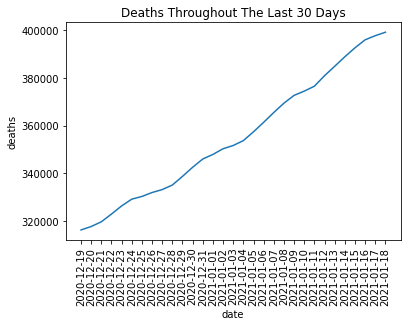

In [20]:

sns.lineplot(data = thirty, x="date", y='deaths',legend='auto')
plt.title('Deaths Throughout The Last 30 Days')
plt.xticks(rotation=90);

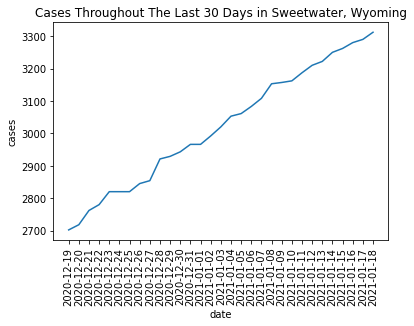

In [47]:
sns.lineplot(x = df1_sweet_30['date'], y = df1_sweet_30['cases'],err_style=None)
plt.title('Cases Throughout The Last 30 Days in Sweetwater, Wyoming')
plt.xticks(rotation=90);

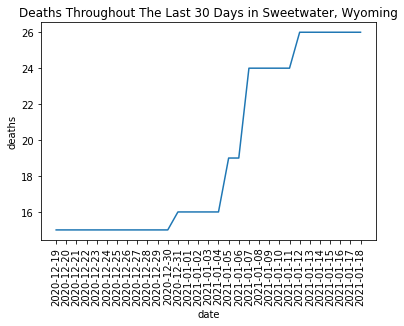

In [48]:
sns.lineplot(x = df1_sweet_30['date'], y = df1_sweet_30['deaths'],err_style=None)
plt.title('Deaths Throughout The Last 30 Days in Sweetwater, Wyoming')
plt.xticks(rotation=90);

creating a list of 4 states of interest

In [30]:
states = ['New York', 'Washington', 'Wyoming', 'California']

filtering for a desired set of states

In [32]:
bool_mask = (df1['state'] == 'New York') | (df1['state'] == 'Washington') | (df1['state'] == 'Wyoming') | (df1['state'] == 'California')
data = df1[bool_mask]

filtering only states from the data assigning it to a new variable

In [87]:
states = countystate.groupby(['state'], as_index=False).sum()
states.head()

,state,cases,deaths
0,Alabama,39387839,623682.0
1,Alaska,3746919,16993.0
2,Arizona,58155441,1230889.0
3,Arkansas,22942245,358365.0
4,California,223616503,3603584.0


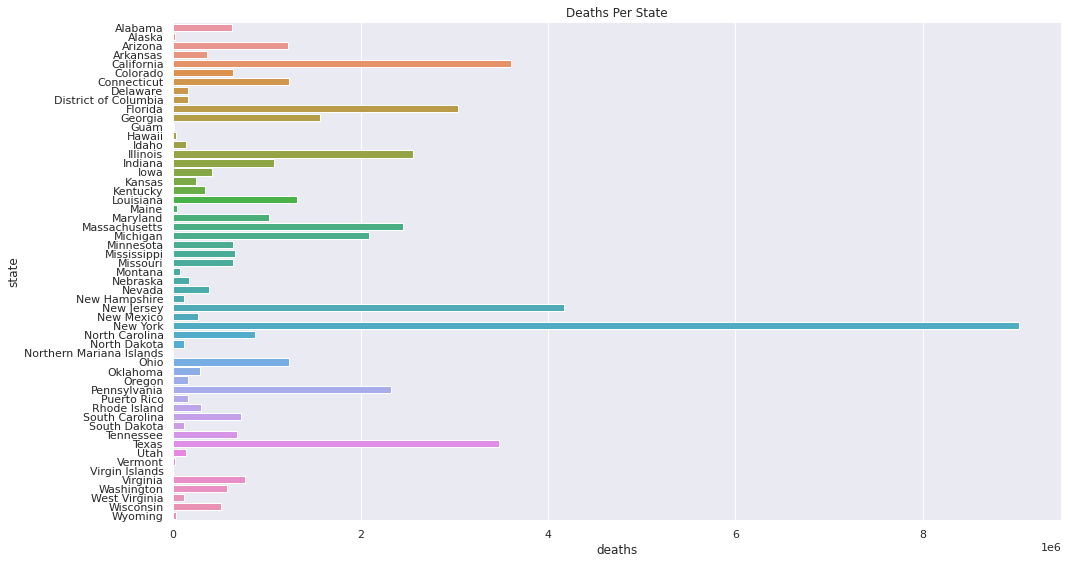

In [89]:
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

#ax = sns.barplot(x="budget2018", y="ministere", data=budget, label="Total")
sns.set_color_codes("pastel")
sns.barplot(x="deaths", y="state", data=states, label="Deaths Per State")

sns.despine(left=True, bottom=True)
plt.title("Deaths Per State")
plt.tight_layout()
plt.show()

In [118]:
states2 = pd.melt(states, id_vars=['state'], value_vars=['deaths','cases'], var_name='Survived')

In [119]:
states2.head()

,state,Survived,value
0,Alabama,deaths,623682.0
1,Alaska,deaths,16993.0
2,Arizona,deaths,1230889.0
3,Arkansas,deaths,358365.0
4,California,deaths,3603584.0


Comparing cases with deaths in each state

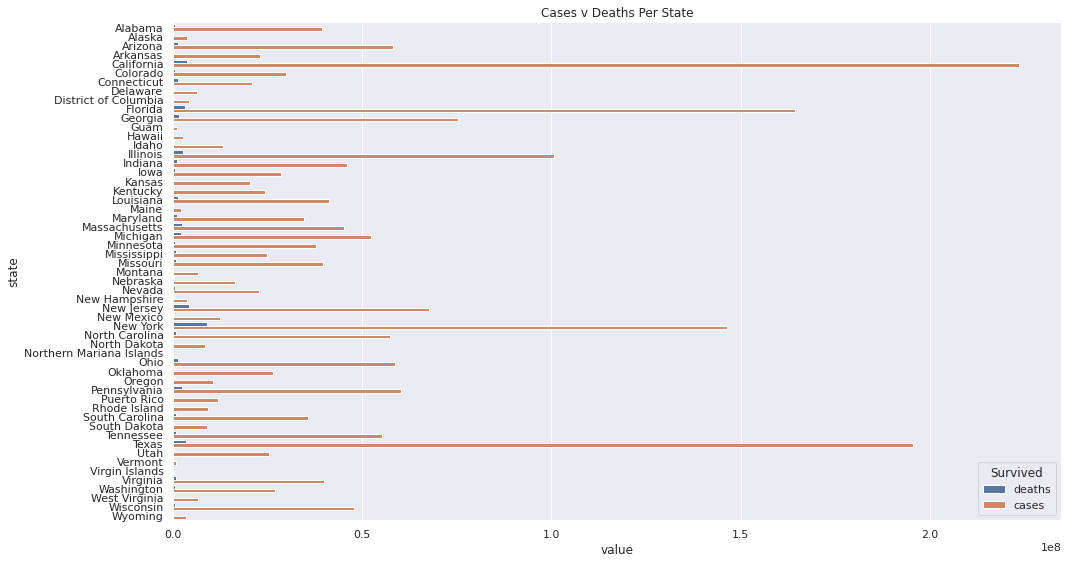

In [122]:
plt.figure(figsize=(15,8))

sns.set(style="darkgrid")


sns.set_color_codes("pastel")
sns.barplot(x="value", y="state", data=states2, hue='Survived')

sns.despine(left=True, bottom=True)
plt.title("Cases v Deaths Per State")
plt.tight_layout()
plt.show()

#In conclusion, the data shows that there has been a great recovery rate in every state. New York, New Jersey, California, Florida and Texas seem to lead the country in death count with a considerable amount of cases respectively.